# Extract playlist informations from Spotify

We will use the features which were extracted with the `spotify_features.ipynb` Notebook. The mentoined Notebook servers a `csv` file which contains the features for 290 songs of the same generes as the ones we used for our own songs.

In [62]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
plt.style.use('fivethirtyeight')

In [22]:
df = pd.read_csv('spotify_features.csv', index_col=[0])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 0 to 59
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        290 non-null    object 
 1   artist            290 non-null    object 
 2   track_id          290 non-null    object 
 3   track_duration    290 non-null    int64  
 4   track_popularity  290 non-null    int64  
 5   acousticness      290 non-null    float64
 6   danceability      290 non-null    float64
 7   energy            290 non-null    float64
 8   instrumentalness  290 non-null    float64
 9   liveness          290 non-null    float64
 10  loudness          290 non-null    float64
 11  speechiness       290 non-null    float64
 12  tempo             290 non-null    float64
 13  valence           290 non-null    float64
 14  genre             290 non-null    int64  
dtypes: float64(9), int64(3), object(3)
memory usage: 36.2+ KB


## Preprocess Data

Same approach / pipeline as in the `feature_analyze.ipynb` for my own created features.

In [24]:
df.columns

Index(['track_name', 'artist', 'track_id', 'track_duration',
       'track_popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'genre'],
      dtype='object')

The Genre column is encoded like this:

```python
hardstyle['genre'] = 0
classic['genre'] = 1
punk['genre'] = 2
house['genre'] = 3
```

In [25]:
df.head()

,track_name,artist,track_id,track_duration,track_popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,My Beautiful Fantasy,Phuture Noize,1a3M9MU7mmhQerLzHSGD3w,192014,54,0.13200,0.319,0.865,0.00000,0.1520,-2.528,0.0415,155.174,0.0845,0
1,Primal Energy (Defqon.1 2020 Anthem),D-Block & S-te-Fan,3ppJijBGMSBnz45elmwh5V,316800,62,0.02510,0.297,0.935,0.00001,0.1570,-2.188,0.0758,112.603,0.1470,0
2,Mellow,Showtek,6AQpd05OyowTvtO7I3BdBU,169839,50,0.04500,0.565,0.873,0.08980,0.0898,-2.973,0.0398,149.995,0.4100,0
3,Danse Macabre - Kan Takahiko Remix,Naeleck,3tvFbMS6E3mk6KY3hJn3Ht,267200,43,0.00678,0.635,0.933,0.02360,0.3430,-4.264,0.2210,150.060,0.1510,0
4,Feel It!,D-Block & S-te-Fan,01xdiGuSuIf5qZulm1uqkY,236903,61,0.01910,0.459,0.941,0.00000,0.3710,-2.053,0.0777,155.023,0.3990,0


In [30]:
def encode_labels(x):
    if x == 0:
        return 'hardstyle'
    elif x == 1:
        return 'classic'
    elif x == 2:
        return 'punk'
    elif x == 3:
        return 'house'

In [31]:
df['genre_name'] = df.genre.apply(lambda x: encode_labels(x))

In [36]:
df.genre_name.value_counts()

punk         150
house         60
hardstyle     50
classic       30
Name: genre_name, dtype: int64

In [39]:
X = df[['acousticness', 'danceability', 'energy', 'instrumentalness',
        'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
y = df.genre

**Scale Data:**

In [40]:
scaler = MinMaxScaler()

In [41]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.index = X.index

In [42]:
X_scaled

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.132528,0.295144,0.866452,0.000000,0.145258,0.973093,0.035899,0.668089,0.055801
1,0.025199,0.268499,0.936741,0.000011,0.151261,0.981683,0.129181,0.354894,0.123128
2,0.045179,0.593073,0.874485,0.094826,0.070588,0.961850,0.031275,0.629987,0.406442
3,0.006805,0.677849,0.934732,0.024921,0.374550,0.929234,0.524069,0.630465,0.127437
4,0.019175,0.464697,0.942765,0.000000,0.408163,0.985094,0.134349,0.666978,0.394592
...,...,...,...,...,...,...,...,...,...
55,0.018371,0.751726,0.836329,0.000020,0.073950,0.928274,0.009247,0.424160,0.758699
56,0.009506,0.689960,0.850387,0.000000,0.833133,0.947374,0.051945,0.424227,0.340730
57,0.004426,0.716604,0.875490,0.000660,0.052461,0.930800,0.063095,0.438727,0.513088
58,0.006675,0.761415,0.832312,0.026822,0.180072,0.908517,0.022301,0.438683,0.659593


**PCA:**

In [43]:
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'])

In [44]:
principalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6
0,0.035909,0.420033,-0.120479,-0.194235,-0.102860,0.010043
1,-0.030589,0.252803,-0.289744,-0.182593,-0.063978,0.246718
2,-0.116359,0.050749,0.006018,-0.011204,-0.211703,-0.074675
3,-0.172219,0.371786,-0.286231,0.160251,-0.022806,-0.108896
4,-0.233005,0.204966,-0.044161,0.014417,0.126555,-0.059483


In [46]:
principalDf['target'] = df.genre.values
principalDf['target_name'] = df.genre_name.values
principalDf

,pc1,pc2,pc3,pc4,pc5,pc6,target,target_name
0,0.035909,0.420033,-0.120479,-0.194235,-0.102860,0.010043,0,hardstyle
1,-0.030589,0.252803,-0.289744,-0.182593,-0.063978,0.246718,0,hardstyle
2,-0.116359,0.050749,0.006018,-0.011204,-0.211703,-0.074675,0,hardstyle
3,-0.172219,0.371786,-0.286231,0.160251,-0.022806,-0.108896,0,hardstyle
4,-0.233005,0.204966,-0.044161,0.014417,0.126555,-0.059483,0,hardstyle
...,...,...,...,...,...,...,...,...
285,-0.262069,-0.360368,0.021421,-0.054544,-0.158218,-0.094124,3,house
286,-0.202538,0.026835,-0.387818,0.172090,0.438438,-0.244160,3,house
287,-0.204742,-0.158070,-0.108406,-0.050899,-0.223945,-0.063611,3,house
288,-0.228935,-0.279412,-0.050159,0.006564,-0.092647,-0.131339,3,house


<AxesSubplot:>

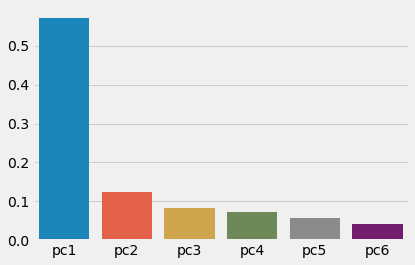

In [63]:
sns.barplot(x=principalDf.columns[:-2], y= pca.explained_variance_ratio_)

Ratio of explained variance is similar to the PCA with *our* song data.

In [52]:
fig = px.scatter_3d(principalDf, x='pc1', y='pc2', z='pc3', color='target_name', title='PCA - Spotify')
fig.write_html("plots/spotify_pca_scatter.html")

The first glance gives the impression that with the spotify parameters it is much easier to distinguish between *classic* or *not classic* but the other three genres are much closer than before. Anyways, as we just plot the first three PC's it is possible that in a higher dimensional room the genres are easier to separate.

## Machine Learning with SVM

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33,
                                                    stratify=y ,random_state=7)

In [56]:
y_train.value_counts() / len(y_train)

2    0.515464
3    0.206186
0    0.175258
1    0.103093
Name: genre, dtype: float64

In [57]:
y_test.value_counts() / len(y_test)

2    0.520833
3    0.208333
0    0.166667
1    0.104167
Name: genre, dtype: float64

In [58]:
clf_svm = SVC(gamma='auto')
clf_svm.fit(X_train, y_train)

SVC(gamma='auto')

In [59]:
svm_preds = clf_svm.predict(X_test)

In [60]:
print(classification_report(y_test, svm_preds))

              precision    recall  f1-score   support

           0       1.00      0.06      0.12        16
           1       1.00      1.00      1.00        10
           2       0.60      1.00      0.75        50
           3       1.00      0.05      0.10        20

    accuracy                           0.65        96
   macro avg       0.90      0.53      0.49        96
weighted avg       0.79      0.65      0.53        96



**SVM with first four PCAs**

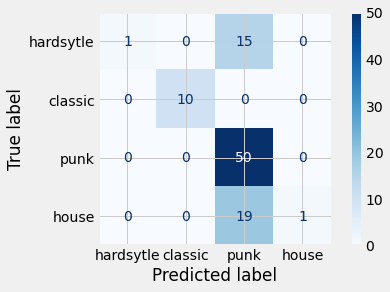

In [64]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

class_names = ['hardsytle', 'classic', 'punk', 'house']

cnf_matrix = confusion_matrix(y_test, svm_preds)
disp = plot_confusion_matrix(clf_svm, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.savefig('./plots/spotify_confusion_matrix.png')
plt.show()

## Result

As expected by looking at the PCA plot the accuracy is lower than with out generated features! Here we only achieve 65% (68% with PCA data) compared to 95% with our features!

To be fair, we had 27 features and spotify only provides 9. 

Anyways, this is a great success and we outperformt SPOTIFYYYYYYYYYYYYY :-)